In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from collections import Counter
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Carregar os ficheiros .csv e atribuir um valor NA para os campos que possuem '?'
training = pd.read_csv('training.csv', sep=';')
test = pd.read_csv('test.csv', sep=';')

In [3]:
#Unir os dois datasets
df = training.append(test)

In [4]:
#Visualizar as 20 primeiras observações
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    48842 non-null  int64 
 1   workclass              48842 non-null  object
 2   fnlwgt                 48842 non-null  int64 
 3   education              48842 non-null  object
 4   education-num          48842 non-null  int64 
 5   marital-status         48842 non-null  object
 6   occupation             48842 non-null  object
 7   relationship           48842 non-null  object
 8   race                   48842 non-null  object
 9   sex                    48842 non-null  object
 10  capital-gain           48842 non-null  int64 
 11  capital-loss           48842 non-null  int64 
 12  hours-per-week         48842 non-null  int64 
 13  native-country         48842 non-null  object
 14  salary-classification  48842 non-null  object
dtypes: int64(6), object

In [6]:
#Visalizar como está a string dos nomes das variaveis
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary-classification'],
      dtype='object')

In [7]:
# Substituir os campos que possuem valor "?" pelo valor mais frequente da variável referente ao campo sinalizado
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='?', strategy='most_frequent')

In [8]:
    df=imp.fit_transform(df)


In [9]:
df = pd.DataFrame(df, columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary-classification'])
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
# Transformar variaveis em tipo categorico
lista = ['workclass','education','marital-status','occupation','relationship','race','native-country','salary-classification','sex']
for i in lista:
    df[i] = pd.Categorical(df[i])

In [11]:
# Transformar varivaveis em tipo numerico
lista = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for i in lista:
    df[i] = df[i].astype(np.int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    48842 non-null  int64   
 1   workclass              48842 non-null  category
 2   fnlwgt                 48842 non-null  int64   
 3   education              48842 non-null  category
 4   education-num          48842 non-null  int64   
 5   marital-status         48842 non-null  category
 6   occupation             48842 non-null  category
 7   relationship           48842 non-null  category
 8   race                   48842 non-null  category
 9   sex                    48842 non-null  category
 10  capital-gain           48842 non-null  int64   
 11  capital-loss           48842 non-null  int64   
 12  hours-per-week         48842 non-null  int64   
 13  native-country         48842 non-null  category
 14  salary-classification  48842 non-null 

In [13]:
# Resumo da distribuição de classe 
classes = df.values[:,14]
counter = Counter(classes)
for k,v in counter.items():
	per = v / len(classes) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=37155, Percentage=76.072%
Class=>50K, Count=11687, Percentage=23.928%


In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Catplot

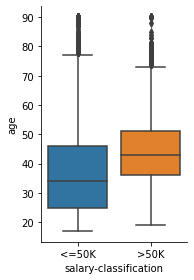

In [15]:
sns.catplot(x="salary-classification", y="age",
                data=df, kind="box",
                height=4, aspect=.7)

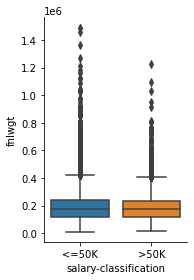

In [16]:
sns.catplot(x="salary-classification", y="fnlwgt",
                data=df, kind="box",
                height=4, aspect=.7)

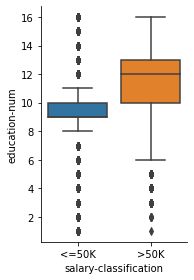

In [17]:
sns.catplot(x="salary-classification", y="education-num",
                data=df, kind="box",
                height=4, aspect=.7)

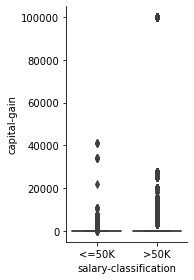

In [18]:
sns.catplot(x="salary-classification", y="capital-gain",
                data=df, kind="box",
                height=4, aspect=.7)

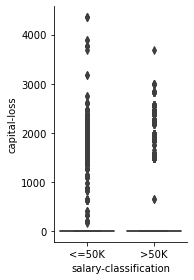

In [19]:
sns.catplot(x="salary-classification", y="capital-loss",
                data=df, kind="box",
                height=4, aspect=.7)

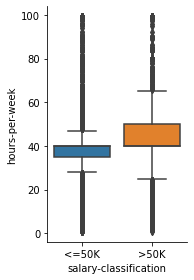

In [20]:
sns.catplot(x="salary-classification", y="hours-per-week",
                data=df, kind="box",
                height=4, aspect=.7)

# Barplot

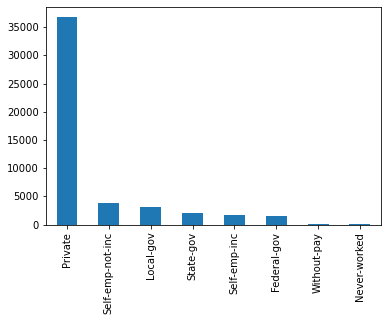

In [21]:
df['workclass'].value_counts().plot(kind='bar')

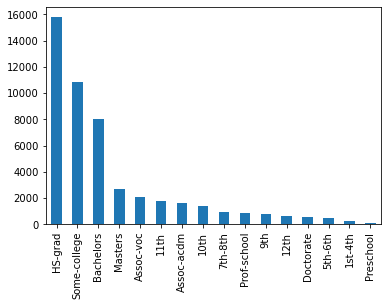

In [22]:
df['education'].value_counts().plot(kind='bar')

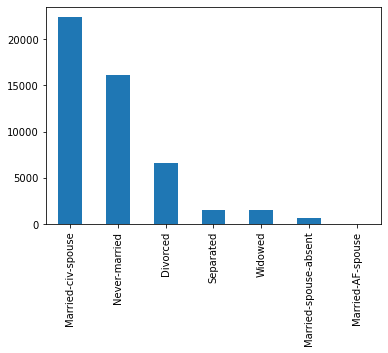

In [23]:
df['marital-status'].value_counts().plot(kind='bar')

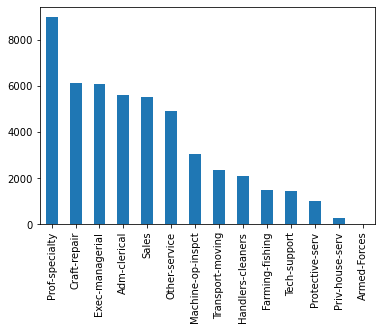

In [24]:
df['occupation'].value_counts().plot(kind='bar')

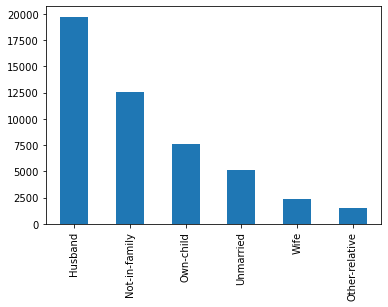

In [25]:
df['relationship'].value_counts().plot(kind='bar')

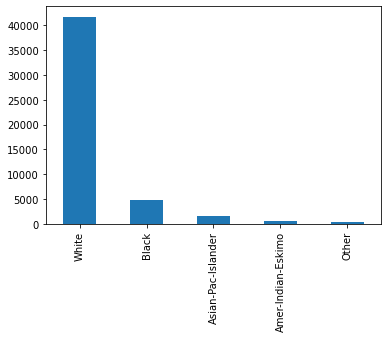

In [26]:
df['race'].value_counts().plot(kind='bar')

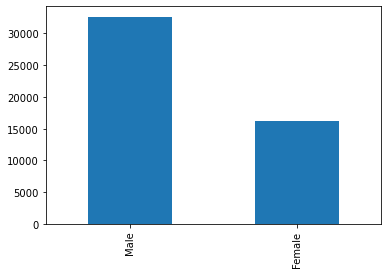

In [27]:
df['sex'].value_counts().plot(kind='bar')

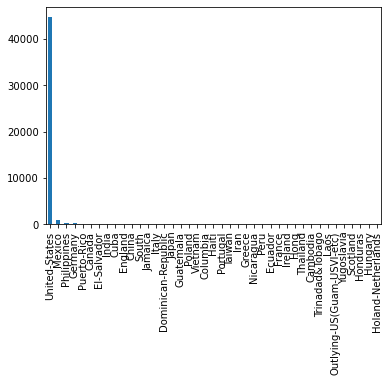

In [28]:
df['native-country'].value_counts().plot(kind='bar')

In [29]:
lista = ['workclass','education','marital-status','occupation','relationship','race','native-country','salary-classification','sex']
for i in lista:
    df[i] = df[i].cat.codes

In [30]:
#from sklearn.preprocessing import OrdinalEncoder
#ord_enc = OrdinalEncoder(dtype=np.int64)

In [31]:
#lista = ['workclass','education','marital-status','occupation','relationship','race','native-country','salary-classification','sex']
#for i in lista:
   #df[i] = ord_enc.fit_transform(df[[i]])

# Train e Test Dataset

In [32]:
#Criar a planilha com as colunas com as variáveis preditoras
preditors = df.drop('salary-classification', axis=1)

In [33]:
#Criar a planilha com a variável target (alvo)
target = df['salary-classification']

In [34]:
preditors.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [35]:
target.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    1
Name: salary-classification, dtype: int8

In [36]:
#Criar subconjunto de dados de treino e de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preditors, target, test_size=0.3, random_state=1)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 15474 to 33003
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             34189 non-null  int64
 1   workclass       34189 non-null  int8 
 2   fnlwgt          34189 non-null  int64
 3   education       34189 non-null  int8 
 4   education-num   34189 non-null  int64
 5   marital-status  34189 non-null  int8 
 6   occupation      34189 non-null  int8 
 7   relationship    34189 non-null  int8 
 8   race            34189 non-null  int8 
 9   sex             34189 non-null  int8 
 10  capital-gain    34189 non-null  int64
 11  capital-loss    34189 non-null  int64
 12  hours-per-week  34189 non-null  int64
 13  native-country  34189 non-null  int8 
dtypes: int64(6), int8(8)
memory usage: 2.1 MB


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14653 entries, 391 to 35955
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             14653 non-null  int64
 1   workclass       14653 non-null  int8 
 2   fnlwgt          14653 non-null  int64
 3   education       14653 non-null  int8 
 4   education-num   14653 non-null  int64
 5   marital-status  14653 non-null  int8 
 6   occupation      14653 non-null  int8 
 7   relationship    14653 non-null  int8 
 8   race            14653 non-null  int8 
 9   sex             14653 non-null  int8 
 10  capital-gain    14653 non-null  int64
 11  capital-loss    14653 non-null  int64
 12  hours-per-week  14653 non-null  int64
 13  native-country  14653 non-null  int8 
dtypes: int64(6), int8(8)
memory usage: 915.8 KB


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    48842 non-null  int64
 1   workclass              48842 non-null  int8 
 2   fnlwgt                 48842 non-null  int64
 3   education              48842 non-null  int8 
 4   education-num          48842 non-null  int64
 5   marital-status         48842 non-null  int8 
 6   occupation             48842 non-null  int8 
 7   relationship           48842 non-null  int8 
 8   race                   48842 non-null  int8 
 9   sex                    48842 non-null  int8 
 10  capital-gain           48842 non-null  int64
 11  capital-loss           48842 non-null  int64
 12  hours-per-week         48842 non-null  int64
 13  native-country         48842 non-null  int8 
 14  salary-classification  48842 non-null  int8 
dtypes: int64(6), int8(9)
memory usage: 2

In [40]:
#vertor para armazenar os valores das perfomances de cada modelo e ao final do programa gerar uma tabela comparativa
performance = []

# Naive Bayes

In [41]:
#Metodo Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()


In [42]:
#Executar o modelo e aplicar o predict sobre o modelo para uma posterior análise de desempenho do mesmo
NBmodel.fit(X_train, y_train)
NBpredict = NBmodel.predict(X_test)

In [43]:
#Confusion Matrix para Modelo Naive Bayes
print(classification_report(y_test, NBpredict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11152
           1       0.64      0.31      0.42      3501

    accuracy                           0.79     14653
   macro avg       0.72      0.63      0.65     14653
weighted avg       0.77      0.79      0.77     14653



In [44]:
# Armazenar nas variáveis os Scores dos dataset de treino e teste
train_score = NBmodel.score(X_train, y_train)
test_score = NBmodel.score(X_test, y_test) #Accuracy

In [45]:
#Exibe no console os scores de treino e teste. 
print(f'Gaussian Naive Bayes : Training score - {train_score} | Accuracy score - {test_score}')

#Armazena os valores obtidos acima no vetor performance.
performance.append({'Algoritmo':'Gaussian Naive Bayes', 'training_score':train_score, 'accuracy_score':test_score})

Gaussian Naive Bayes : Training score - 0.792886600953523 | Accuracy score - 0.7928069337337064


# Logistic Regression

In [46]:
#Metodo Regressao Logistica
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train)
logpredict = logmodel.predict(X_test)

In [48]:
print(classification_report(y_test, logpredict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11152
           1       0.72      0.25      0.38      3501

    accuracy                           0.80     14653
   macro avg       0.76      0.61      0.63     14653
weighted avg       0.79      0.80      0.76     14653



In [49]:
train_score = logmodel.score(X_train, y_train)
test_score = logmodel.score(X_test, y_test)

print(f'LogisticRegression : Training s core - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'LogisticRegression', 'training_score':train_score, 'accuracy_score':test_score})

LogisticRegression : Training s core - 0.7987949340431133 | Accuracy - 0.7982665665733979


# K-Nearest Neighbors

In [50]:
# Metodo KNN
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []

Text(0, 0.5, 'Mean Error')

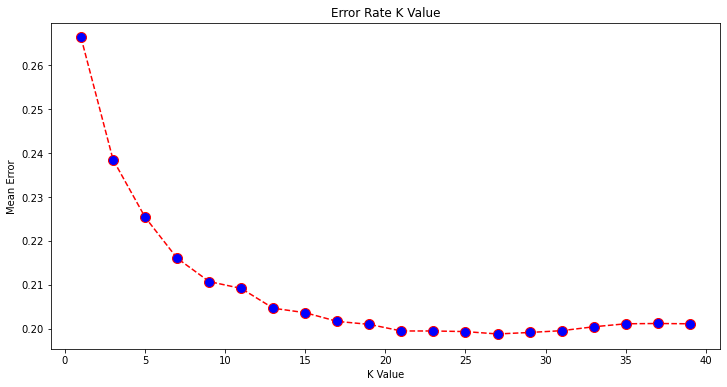

In [51]:
train_scores = []
test_scores = []
error = []

for n in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred_n = knn.predict(X_test)
    error.append(np.mean(pred_n != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40, 2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
    

In [52]:
knn = KNeighborsClassifier(n_neighbors=21)


In [53]:
knn.fit(X_train, y_train)
knnpredict = knn.predict(X_test)

In [54]:
print(classification_report(y_test, knnpredict))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     11152
           1       0.80      0.22      0.34      3501

    accuracy                           0.80     14653
   macro avg       0.80      0.60      0.61     14653
weighted avg       0.80      0.80      0.75     14653



In [55]:
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f'K Neighbors : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'K Neighbors', 'training_score':train_score, 'accuracy_score':train_score})

K Neighbors : Training score - 0.8061657258182456 | Accuracy - 0.8005186651197707


# Random Forest

In [56]:
# Metodo Random Forest (Floresta Aleatoria)
from sklearn.ensemble import RandomForestClassifier
rndTree = RandomForestClassifier()

In [57]:
rndTree.fit(X_train,y_train)
rndTpredict = rndTree.predict(X_test)

In [58]:
print(classification_report(y_test, rndTpredict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11152
           1       0.73      0.62      0.67      3501

    accuracy                           0.85     14653
   macro avg       0.81      0.77      0.79     14653
weighted avg       0.85      0.85      0.85     14653



In [59]:
train_score = rndTree.score(X_train,y_train)
test_score = rndTree.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'Random Forests', 'training_score':train_score, 'accuracy_score':test_score})

Random Forests : Training score - 0.9999707508262892 | Accuracy - 0.8542278031802362


In [60]:
#Decision Tree

In [61]:
# Metodo Decison Tree (Arvore de Decisao)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [62]:
dtc = dtc.fit(X_train, y_train)
dtcpredict = dtc.predict(X_test)

In [63]:
print(classification_report(y_test, dtcpredict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11152
           1       0.60      0.61      0.61      3501

    accuracy                           0.81     14653
   macro avg       0.74      0.74      0.74     14653
weighted avg       0.81      0.81      0.81     14653



In [64]:
train_score = dtc.score(X_train,y_train)
test_score = dtc.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'Decision Tree', 'training_score':train_score, 'accuracy_score':test_score})

Random Forests : Training score - 0.9999707508262892 | Accuracy - 0.8105507404627039


# Performance Result

In [65]:
performance_df = pd.DataFrame(performance)

In [66]:
# Exibir tabela de performance dos modelos
performance_df

,Algoritmo,training_score,accuracy_score
0,Gaussian Naive Bayes,0.792887,0.792807
1,LogisticRegression,0.798795,0.798267
2,K Neighbors,0.806166,0.806166
3,Random Forests,0.999971,0.854228
4,Decision Tree,0.999971,0.810551
